In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('AMZN_stock_data.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [4]:
data.shape

(6987, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6987 non-null   datetime64[ns, UTC]
 1   Open          6987 non-null   float64            
 2   High          6987 non-null   float64            
 3   Low           6987 non-null   float64            
 4   Close         6987 non-null   float64            
 5   Volume        6987 non-null   int64              
 6   Dividends     6987 non-null   float64            
 7   Stock Splits  6987 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 436.8 KB


In [9]:
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [10]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Days
0,1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,0
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,1
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,4
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,5
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,6


In [11]:
data.shape

(6987, 9)

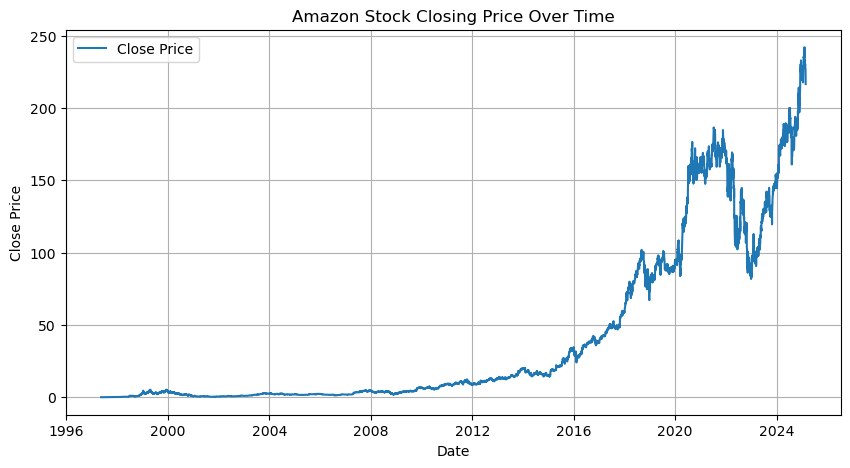

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

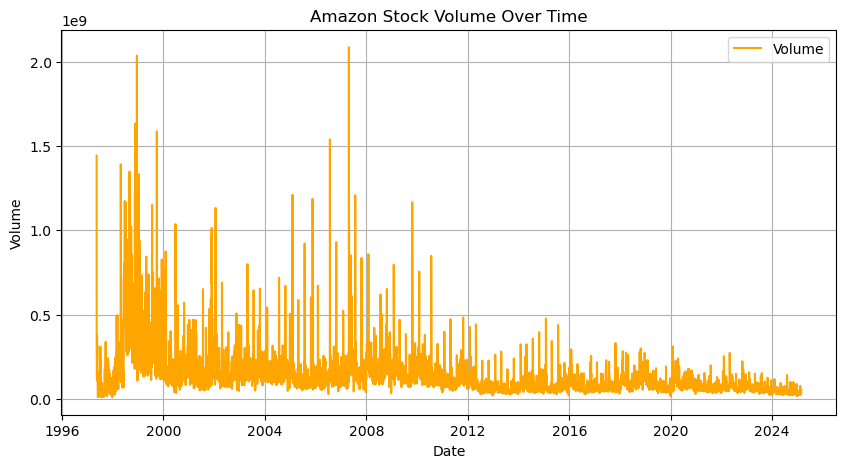

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Amazon Stock Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()


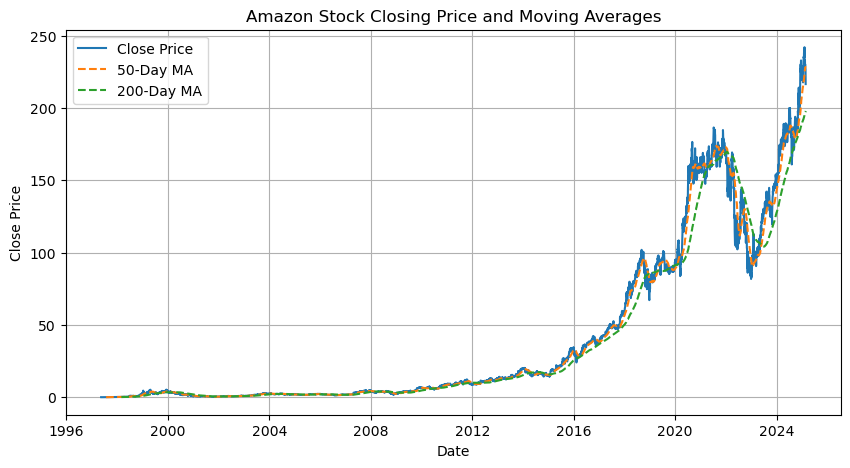

In [14]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['50_MA'], label='50-Day MA', linestyle='--')
plt.plot(data['Date'], data['200_MA'], label='200-Day MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
data['Daily Return'] = data['Close'].pct_change() * 100

In [16]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Days,50_MA,200_MA,Daily Return
0,1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,0,NaN,NaN,NaN
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,1,NaN,NaN,-11.702769
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,4,NaN,NaN,-1.204047
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,5,NaN,NaN,-4.268472
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,6,NaN,NaN,-12.739234


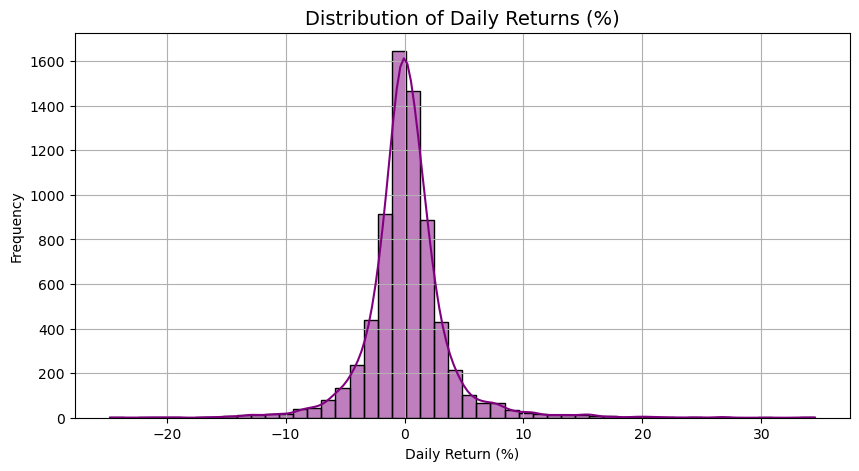

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True, color="purple")
plt.title("Distribution of Daily Returns (%)", fontsize=14)
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

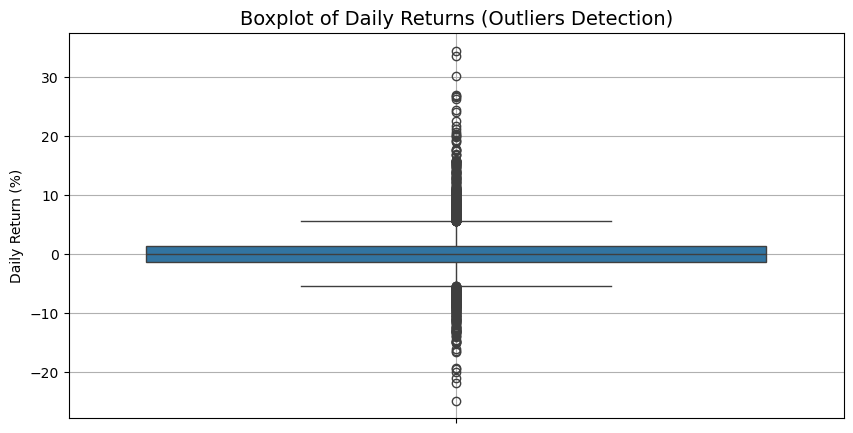

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['Daily Return'])
plt.title("Boxplot of Daily Returns (Outliers Detection)", fontsize=14)
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.show()

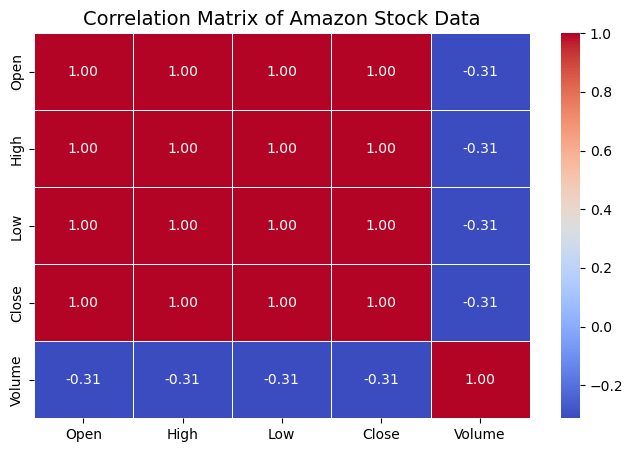

In [19]:
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Amazon Stock Data", fontsize=14)
plt.show()

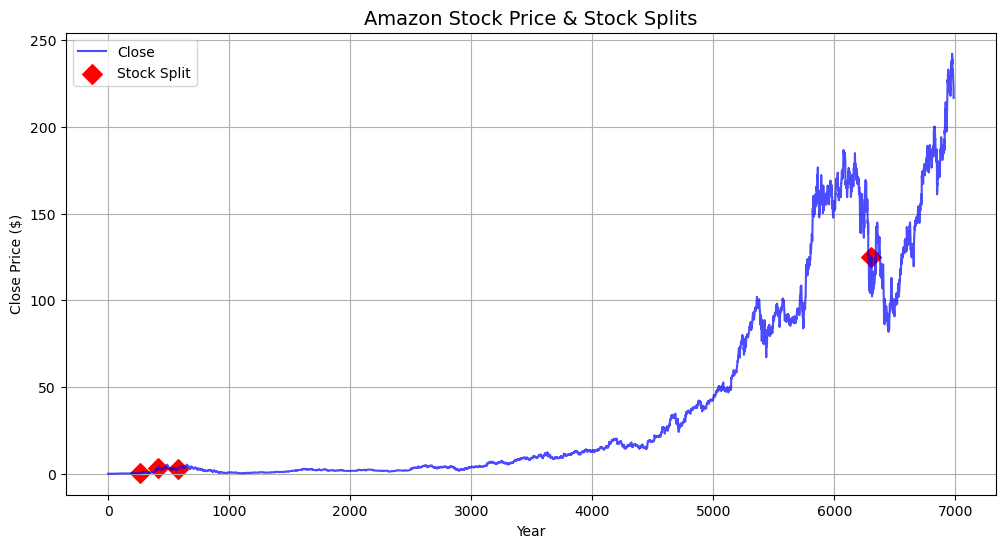

In [20]:
splits = data[data['Stock Splits'] > 0]  # Identify stock split dates

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Close", color="blue", alpha=0.7)
plt.scatter(splits.index, splits['Close'], color='red', label="Stock Split", marker='D', s=100)
plt.title("Amazon Stock Price & Stock Splits", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.show()

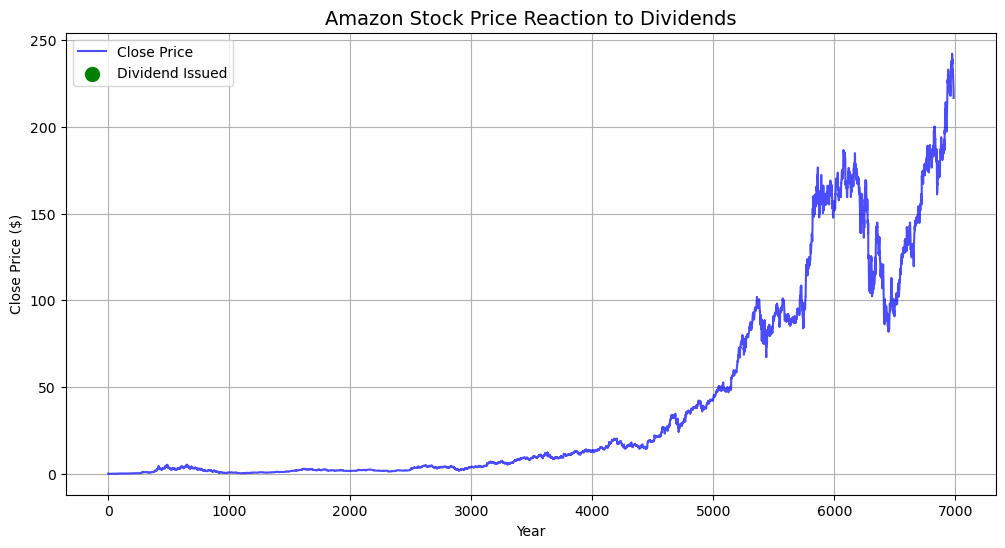

In [21]:
dividends = data[data['Dividends'] > 0]  
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Close Price", color="blue", alpha=0.7)
plt.scatter(dividends.index, dividends['Close'], color='green', label="Dividend Issued", marker='o', s=100)
plt.title("Amazon Stock Price Reaction to Dividends", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.show()

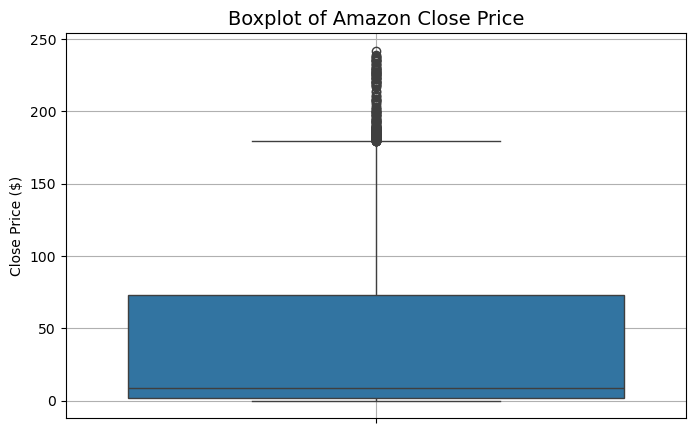

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['Close'])
plt.title("Boxplot of Amazon Close Price", fontsize=14)
plt.ylabel("Close Price ($)")
plt.grid(True)
plt.show()

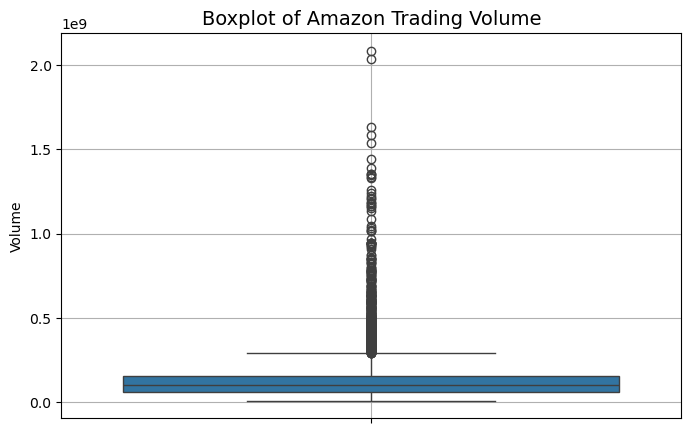

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['Volume'])
plt.title("Boxplot of Amazon Trading Volume", fontsize=14)
plt.ylabel("Volume")
plt.grid(True)
plt.show()

MODEL TRAINING USING ARIMA

In [25]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

ADF Statistic: 1.6544642480328093
p-value: 0.9980121134706945
Critical Values:
   1%: -3.4312909833429956
   5%: -2.8619558385877215
   10%: -2.5669913469586287
❌ The series is likely NON-STATIONARY (fail to reject null hypothesis).


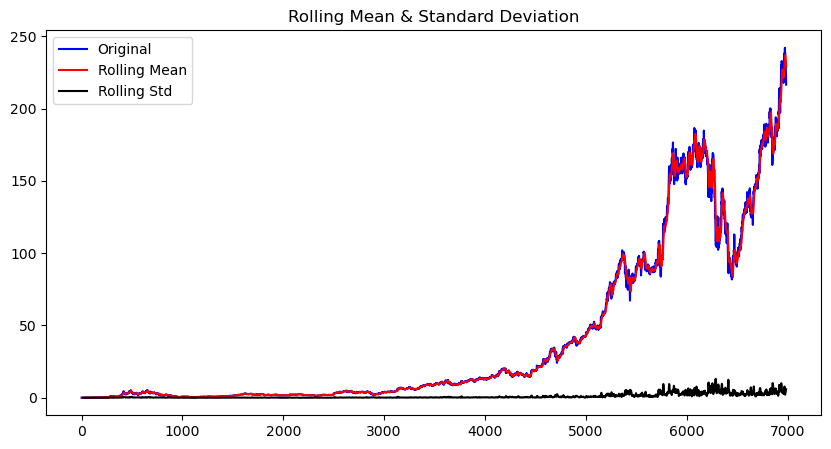

In [27]:
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    if result[1] <= 0.05:
        print("✅ The series is likely STATIONARY (reject null hypothesis).")
    else:
        print("❌ The series is likely NON-STATIONARY (fail to reject null hypothesis).")

# Call the function on 'Close' column
check_stationarity(data['Close'])

def plot_rolling_stats(series, window=12):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Usage
plot_rolling_stats(data['Close'])


In [28]:
data_close=data['Close']
data_close


0         0.097917
1         0.086458
2         0.085417
3         0.081771
4         0.071354
           ...    
6982    228.679993
6983    226.649994
6984    226.630005
6985    222.880005
6986    216.580002
Name: Close, Length: 6987, dtype: float64

ADF Statistic: -14.677389241449319
p-value: 3.1957539369650926e-27
Critical Values:
   1%: -3.4312909833429956
   5%: -2.8619558385877215
   10%: -2.5669913469586287
✅ The series is likely STATIONARY (reject null hypothesis).


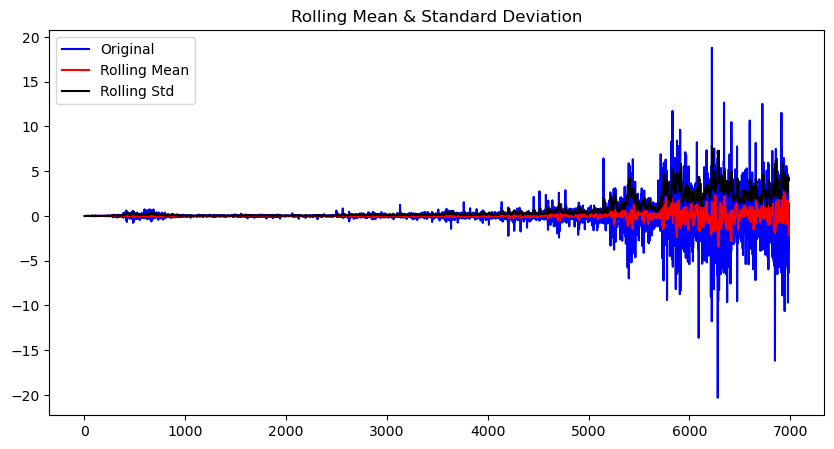

In [63]:
#making the series stationary
# First-order differencing
data['Close_diff'] = data['Close'] - data['Close'].shift(1)
data['Close_diff'].dropna(inplace=True)
check_stationarity(data['Close_diff'].dropna())
plot_rolling_stats(data['Close_diff'])

FITTING THE MODEL

In [66]:
stepwise_model = auto_arima(data['Close'],
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            d=None,            # Let it determine the optimal differencing
                            seasonal=False,    # Set to True if your data has seasonality
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24887.682, Time=1.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24887.038, Time=1.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24886.952, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24888.933, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24889.996, Time=4.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24887.325, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24890.947, Time=2.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=24888.342, Time=0.47 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 12.651 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6987
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -12440.476
Date:                Sat, 28 Jun 2025   AIC                          24886.952
Time:                      

In [70]:
from statsmodels.tsa.arima.model import ARIMA
best_order = stepwise_model.order
print("Best ARIMA order:", best_order)

# Train ARIMA model
model = ARIMA(data['Close'], order=best_order)
model_fit = model.fit()
print(model_fit.summary())

Best ARIMA order: (0, 1, 1)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6987
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12442.171
Date:                Sat, 28 Jun 2025   AIC                          24888.342
Time:                        17:10:16   BIC                          24902.045
Sample:                             0   HQIC                         24893.064
                               - 6987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0196      0.005     -4.185      0.000      -0.029      -0.010
sigma2         2.0630      0.010    213.274      0.000       2.044       2.082
Ljung-Box (L1) (Q):     

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


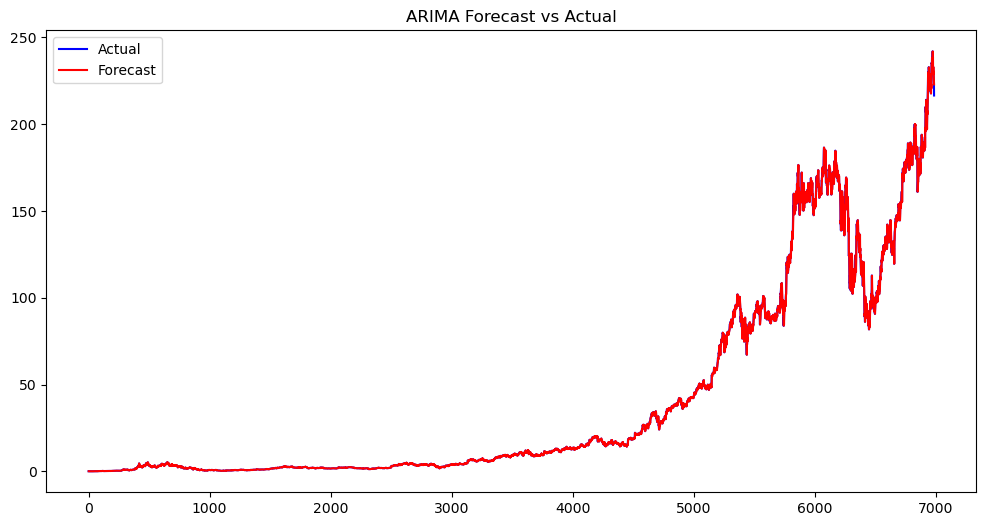

In [74]:
data['forecast'] = model_fit.predict(start=1, end=len(data), typ='levels')
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Actual', color='blue')
plt.plot(data['forecast'], label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

In [76]:
#forecasting next 30days price of stocks
forecast_steps = 30  # e.g., next 30 days
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

6987    216.704895
6988    216.704895
6989    216.704895
6990    216.704895
6991    216.704895
6992    216.704895
6993    216.704895
6994    216.704895
6995    216.704895
6996    216.704895
6997    216.704895
6998    216.704895
6999    216.704895
7000    216.704895
7001    216.704895
7002    216.704895
7003    216.704895
7004    216.704895
7005    216.704895
7006    216.704895
7007    216.704895
7008    216.704895
7009    216.704895
7010    216.704895
7011    216.704895
7012    216.704895
7013    216.704895
7014    216.704895
7015    216.704895
7016    216.704895
Name: predicted_mean, dtype: float64
